In [1]:

import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings("ignore")

df=pd.read_csv('Churn.csv')

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

df.dropna(inplace=True)
df = df.reset_index()[df.columns]

'''def tenure_lab(t) :
    
    if t <= 12 :
        return "Tenure_0-12"
    elif (t > 12) & (t <= 24 ):
        return "Tenure_12-24"
    elif (t > 24) & (t <= 48) :
        return "Tenure_24-48"
    elif (t > 48) & (t <= 60) :
        return "Tenure_48-60"
    elif t > 60 :
        return "Tenure_gt_60"

df["tenure"]=df["tenure"].map(tenure_lab)'''


#since we have 72 categories in tenure we will reduce the number of categories in it
#therefoe we made above function and to check how many categories each column has now,we are using the following loop

for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()
    #print ("Feature", c_n,"has", unique_cat,"unique categories")


X=df.drop('Churn',1)
Y=df.Churn

X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()

num_cols   = [x for x in X.columns if x not in todummy_list]

X_org=X.copy()

for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    #dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
x_transformed= std.fit_transform(X[num_cols])
x_transformed_df = pd.DataFrame(x_transformed,columns=num_cols)

X=X.drop(num_cols,1)
X=pd.concat([X.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)

'''from sklearn import preprocessing

normalized_X = preprocessing.normalize(X[num_cols])
normalized_X = pd.DataFrame(normalized_X,columns=num_cols)
X=X.drop(num_cols,1)
X=pd.concat([X,normalized_X ],axis=1)
X = X.merge(normalized_X,left_index=True,right_index=True,how = "left")'''

#print (X.isnull().sum())

le = LabelEncoder()
Y= le.fit_transform(Y)


'''-------------------------DIMENSION REDUCTION BY PCA-------------------------------'''

from sklearn.decomposition import PCA
pca = PCA(n_components=3)
#X=X.T

fit = pca.fit_transform(X)
pca_data = pd.DataFrame(fit)
# summarize components
print(pca.explained_variance_ratio_)
#print(pca.singular_values_)



# summarize components

tota = 0
for i in range(len(pca.explained_variance_ratio_)):
    tota += pca.explained_variance_ratio_[i]
print('Variance:', tota)
print(pca.singular_values_)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_data, Y, test_size=0.20, random_state=0)


[0.2855402  0.18946532 0.07143623]
Variance: 0.5464417532527179
[153.46543752 125.00915459  76.76021848]


In [2]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    fpr, tpr, thresholds = roc_curve(y_test, predictions)
    
   

    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    '''probs = m.predict_proba(x_test)
    probs = probs[:, 1]


    fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

    #plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr1, tpr1, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)'''


    import matplotlib.pyplot as plt
    import seaborn as sns
    cm = metrics.confusion_matrix(y_test, predictions)
    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);


		-------------------LOGISTIC REGRESSION_WO_Feature_selection----------------



              precision    recall  f1-score   support

           0       0.82      0.90      0.86      1038
           1       0.63      0.46      0.53       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



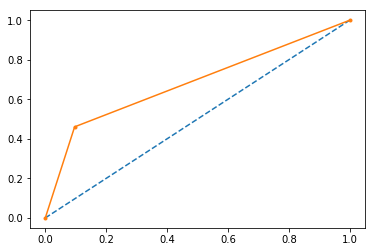

AUC: 0.682


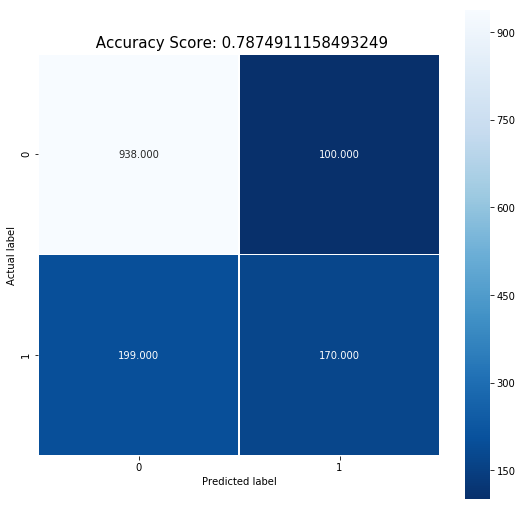

In [3]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_WO_Feature_selection}---------------------------------"""

print ('\t\t-------------------LOGISTIC REGRESSION_WO_Feature_selection----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train, y_train)

predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)




roc_plot(m,x_test,y_test,predictions)

		-------------------LOGISTIC REGRESSION_WO_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7166344294003868
 ROC_AUC FOR FOLD  2 is 0.7260780521105928
 ROC_AUC FOR FOLD  3 is 0.7180566617362611
 ROC_AUC FOR FOLD  4 is 0.7568658541640758
 ROC_AUC FOR FOLD  5 is 0.6861449653857314
 ROC_AUC FOR FOLD  6 is 0.714820917796294
 ROC_AUC FOR FOLD  7 is 0.7434968702068566
 ROC_AUC FOR FOLD  8 is 0.726215644820296
 ROC_AUC FOR FOLD  9 is 0.719432699083862
 ROC_AUC FOR FOLD  10 is 0.7186484121030258


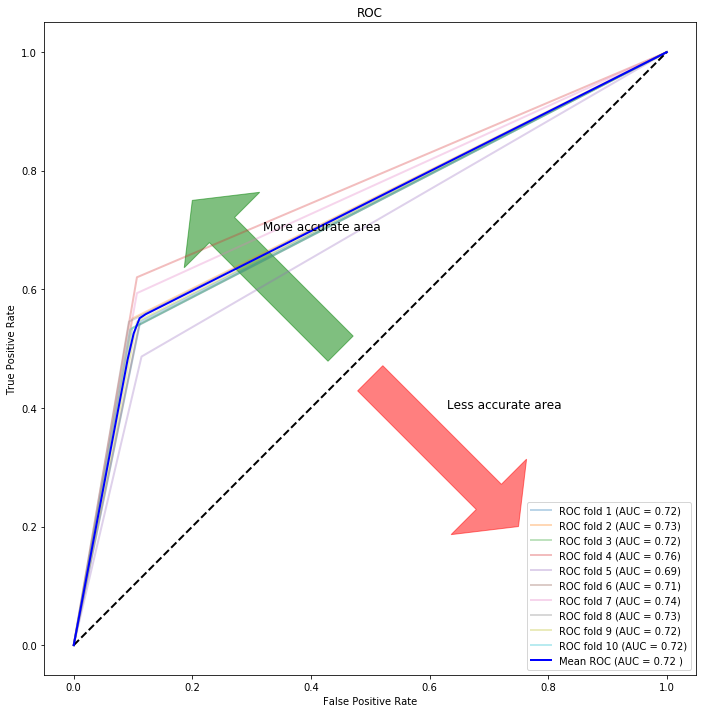

In [4]:
print ('\t\t-------------------LOGISTIC REGRESSION_WO_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(pca_data,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<-----------------------K-fold logistic regression(VALIDATION and TESTING)------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7115839243498817
 ROC_AUC FOR FOLD  2 is 0.7151723592662871
 ROC_AUC FOR FOLD  3 is 0.7128856624319418
 ROC_AUC FOR FOLD  4 is 0.691545605723071
 ROC_AUC FOR FOLD  5 is 0.7413351107465135
 ROC_AUC FOR FOLD  6 is 0.6974838128022294
 ROC_AUC FOR FOLD  7 is 0.6819217503940571
 ROC_AUC FOR FOLD  8 is 0.6859681787406906
 ROC_AUC FOR FOLD  9 is 0.7090291262135923
 ROC_AUC FOR FOLD  10 is 0.6935865858279652


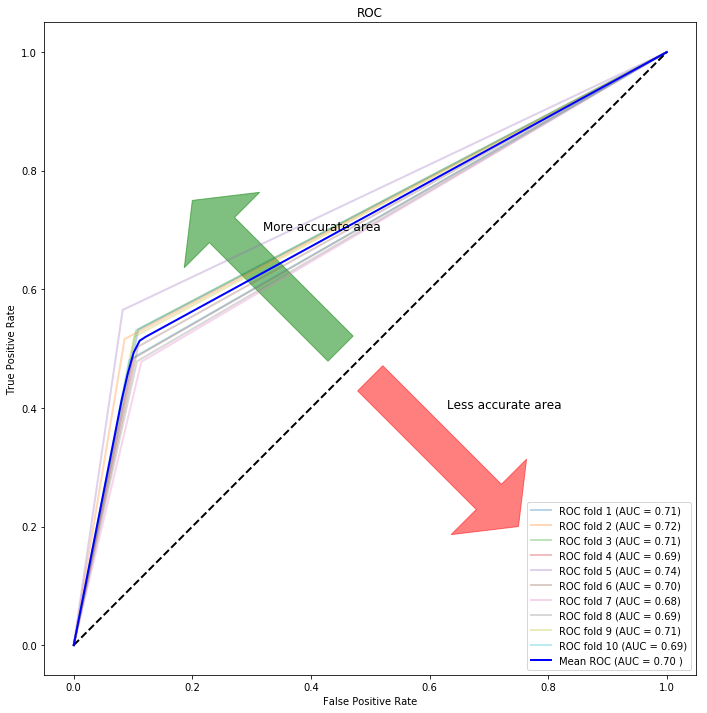

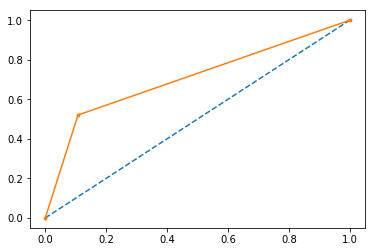

AUC: 0.707


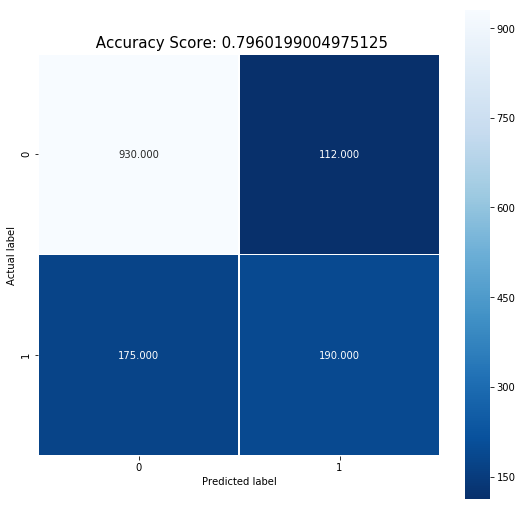

In [5]:
print("<-----------------------K-fold logistic regression(VALIDATION and TESTING)------------------------------------->")

from sklearn.model_selection import train_test_split

x_train_eighty, x_test_twenty, y_train_eighty, y_test_twenty = train_test_split(pca_data, Y, test_size=0.20, random_state=20)

# plot arrows
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt


# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(x_train_eighty, y_train_eighty)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(x_train_eighty,y_train_eighty ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=logisticRegr.fit(pca_data.iloc[train_index],Y[train_index])
    pred=m.predict(pca_data.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()
pred_test=m.predict(x_test_twenty)
roc_plot(m,x_test_twenty,y_test_twenty,pred_test)



In [6]:
x_train_eighty.shape

(5625, 3)

		-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_HoldOut----------------



              precision    recall  f1-score   support

           0       0.85      0.84      0.84      1038
           1       0.56      0.57      0.56       369

   micro avg       0.77      0.77      0.77      1407
   macro avg       0.70      0.70      0.70      1407
weighted avg       0.77      0.77      0.77      1407



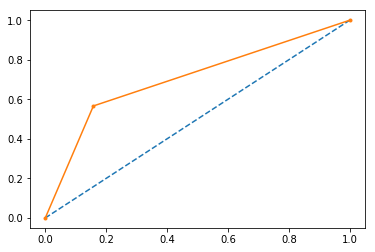

AUC: 0.704


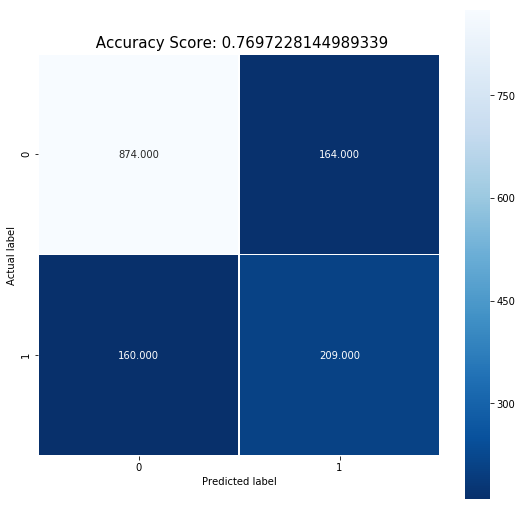

In [7]:
print ('\t\t-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_HoldOut----------------\n\n\n')
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
gnb_ho=GaussianNB()
m=gnb_ho.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test,y_test,predictions)

		-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7566844919786095 and tpr is [0.         0.87700535 1.        ]
 ROC_AUC FOR FOLD  2 is 0.7661281146888157 and tpr is [0.         0.88235294 1.        ]
 ROC_AUC FOR FOLD  3 is 0.7314825349869154 and tpr is [0.         0.85561497 1.        ]
 ROC_AUC FOR FOLD  4 is 0.7652499689093396 and tpr is [0.         0.85026738 1.        ]
 ROC_AUC FOR FOLD  5 is 0.771872279567218 and tpr is [0.         0.89839572 1.        ]
 ROC_AUC FOR FOLD  6 is 0.6990164987771006 and tpr is [0.         0.79144385 1.        ]
 ROC_AUC FOR FOLD  7 is 0.7356775691249016 and tpr is [0.         0.83957219 1.        ]
 ROC_AUC FOR FOLD  8 is 0.7273867263607346 and tpr is [0.         0.80748663 1.        ]
 ROC_AUC FOR FOLD  9 is 0.7363771089831281 and tpr is [0.         0.82352941 1.        ]
 ROC_AUC FOR FOLD  10 is 0.7366529132283073 and tpr is [0.         0.82795699 1.        ]


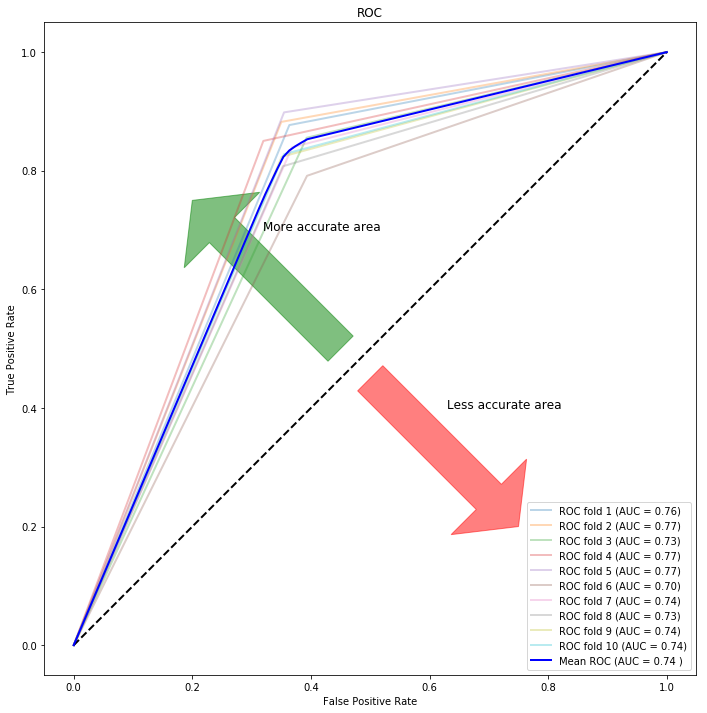

In [8]:
print ('\t\t-------------------Naive Bayes_WO_(FS)_WO_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pylab as plt
gnb=GaussianNB()
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(pca_data,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    gnb_kf=gnb.fit(X.iloc[train_index],Y[train_index])
    pred=gnb_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc,"and tpr is",tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

		-------------------SVM_WO_Feature_selection_(HO)----------------



              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.65      0.47      0.54       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



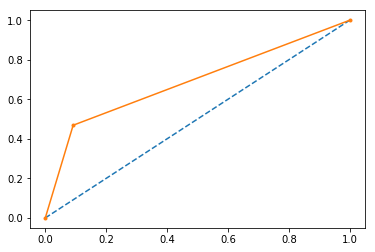

AUC: 0.689


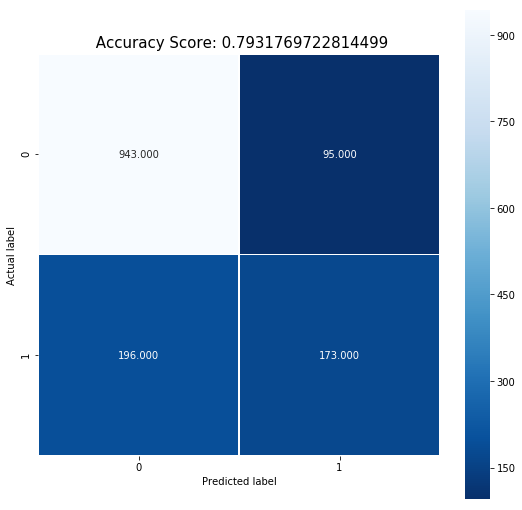

In [9]:
print ('\t\t-------------------SVM_WO_Feature_selection_(HO)----------------\n\n\n')

from sklearn.svm import SVC
SVM=SVC(random_state=0)
'''SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)'''
                         


m=SVM.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test,y_test,predictions)

		-------------------SVM_WO_Feature_selection_(HO){After Tuning}----------------



              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.65      0.47      0.54       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



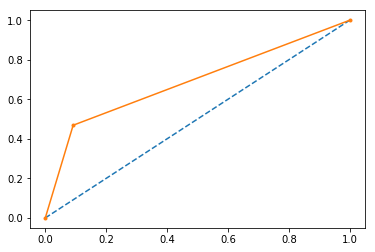

AUC: 0.689


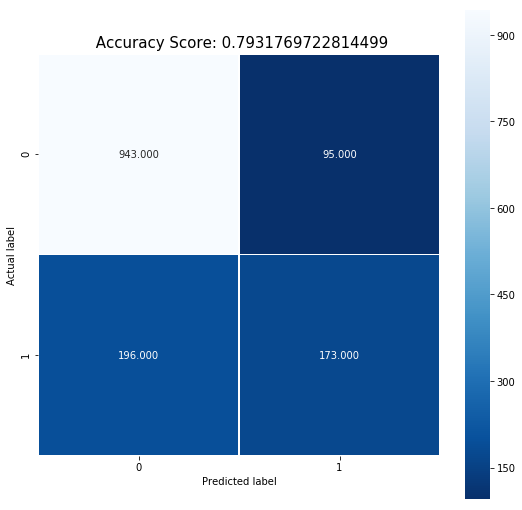

In [10]:
print ('\t\t-------------------SVM_WO_Feature_selection_(HO){After Tuning}----------------\n\n\n')
from sklearn.svm import SVC
SVM=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)


m=SVM.fit(x_train, y_train)

# all parameters not specified are set to their defaults
predictions = m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test,y_test,predictions)

		-------------------SVM_WO_Feature_selection_k_folds----------------



Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7104903857094095
 ROC_AUC FOR FOLD  2 is 0.7094663784275799
 ROC_AUC FOR FOLD  3 is 0.6922289225167824
 ROC_AUC FOR FOLD  4 is 0.7378435517970401
 ROC_AUC FOR FOLD  5 is 0.6642156862745098
 ROC_AUC FOR FOLD  6 is 0.6664231231604693
 ROC_AUC FOR FOLD  7 is 0.6965344277245782
 ROC_AUC FOR FOLD  8 is 0.6892488496455664
 ROC_AUC FOR FOLD  9 is 0.7089344194337355
 ROC_AUC FOR FOLD  10 is 0.6980182545636409


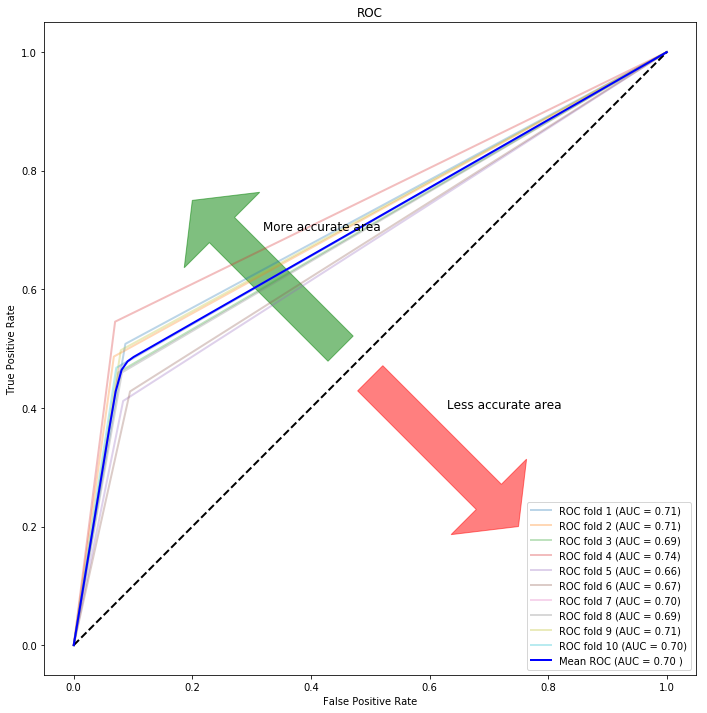

In [11]:
print ('\t\t-------------------SVM_WO_Feature_selection_k_folds----------------\n\n\n')
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp

import matplotlib.patches as patches
import matplotlib.pylab as plt
skf = StratifiedKFold(n_splits=10)
svm=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001, verbose=False)
skf = StratifiedKFold(n_splits=10)

print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(pca_data,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    svm_kf=svm.fit(X.iloc[train_index],Y[train_index])
    pred=svm_kf.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_HO}--------------------
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.62      0.48      0.54       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.69      0.70      1407
weighted avg       0.78      0.79      0.78      1407



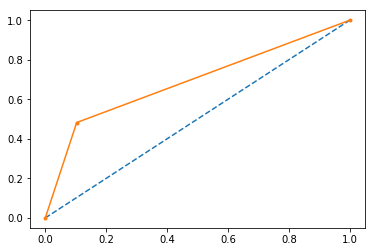

AUC: 0.690


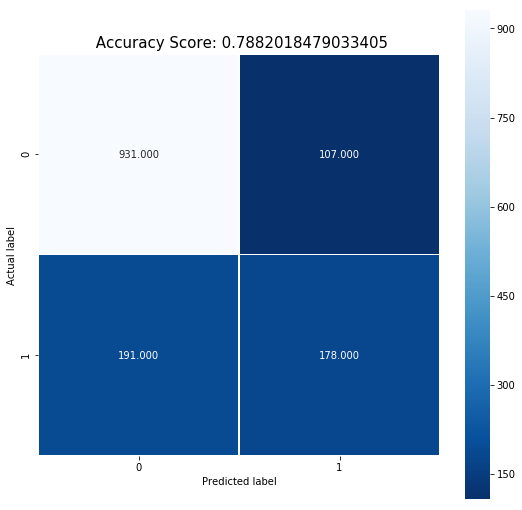

In [12]:
print("""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_HO}--------------------""")

from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split

clf_gini = DecisionTreeClassifier(max_depth = 5).fit(x_train, y_train)
predictions=clf_gini.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(clf_gini,x_test,y_test,predictions)

--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7300603026510412
 ROC_AUC FOR FOLD  2 is 0.7454204118784844
 ROC_AUC FOR FOLD  3 is 0.7293776311298213
 ROC_AUC FOR FOLD  4 is 0.756902126601169
 ROC_AUC FOR FOLD  5 is 0.6910261990631348
 ROC_AUC FOR FOLD  6 is 0.6980785971894042
 ROC_AUC FOR FOLD  7 is 0.7318326907930192
 ROC_AUC FOR FOLD  8 is 0.7075716121543755
 ROC_AUC FOR FOLD  9 is 0.6973427848940844
 ROC_AUC FOR FOLD  10 is 0.6932670667666918


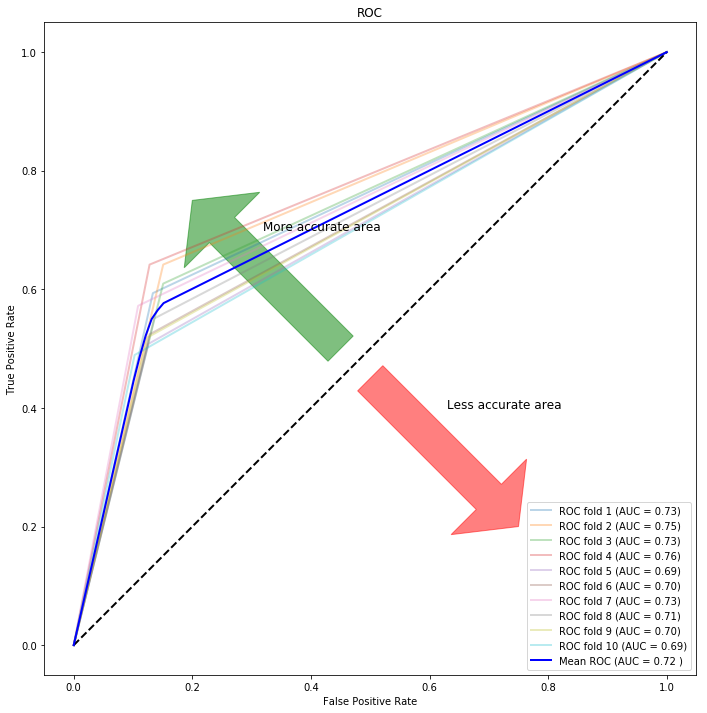

In [13]:
print("""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_KF}--------------------""")
import matplotlib.patches as patches
import matplotlib.pylab as plt

clf_gini = DecisionTreeClassifier(max_depth = 5)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")

fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(pca_data,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    clf_gini_kf=clf_gini.fit(X.iloc[train_index],Y[train_index])
    pred=clf_gini.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

--------------(MODELING PHASE)--{RandomForest_HO}--------------------
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1038
           1       0.57      0.46      0.51       369

   micro avg       0.77      0.77      0.77      1407
   macro avg       0.69      0.67      0.68      1407
weighted avg       0.75      0.77      0.76      1407



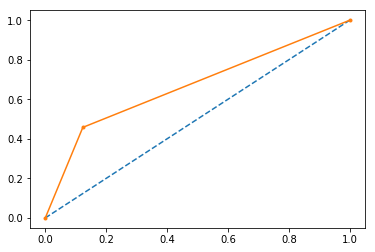

AUC: 0.667


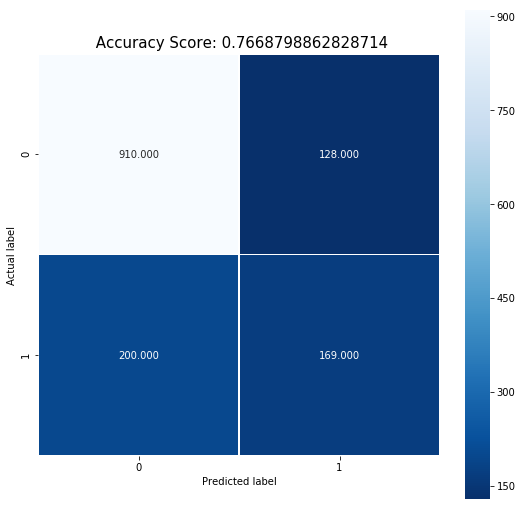

In [14]:
print("""--------------(MODELING PHASE)--{RandomForest_HO}--------------------""")
from sklearn.ensemble import RandomForestClassifier
Rf= RandomForestClassifier(n_estimators=75)
m=Rf.fit(x_train,y_train)
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test,y_test,predictions)

<--------------------------------------K-fold RANDOM FOREST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.709068153373535
 ROC_AUC FOR FOLD  2 is 0.7197064512458754
 ROC_AUC FOR FOLD  3 is 0.6939924906132666
 ROC_AUC FOR FOLD  4 is 0.7058305351739004
 ROC_AUC FOR FOLD  5 is 0.6678947477511089
 ROC_AUC FOR FOLD  6 is 0.6511886995813124
 ROC_AUC FOR FOLD  7 is 0.7104060440243751
 ROC_AUC FOR FOLD  8 is 0.6970370600671557
 ROC_AUC FOR FOLD  9 is 0.7084680595282511
 ROC_AUC FOR FOLD  10 is 0.7085521380345086


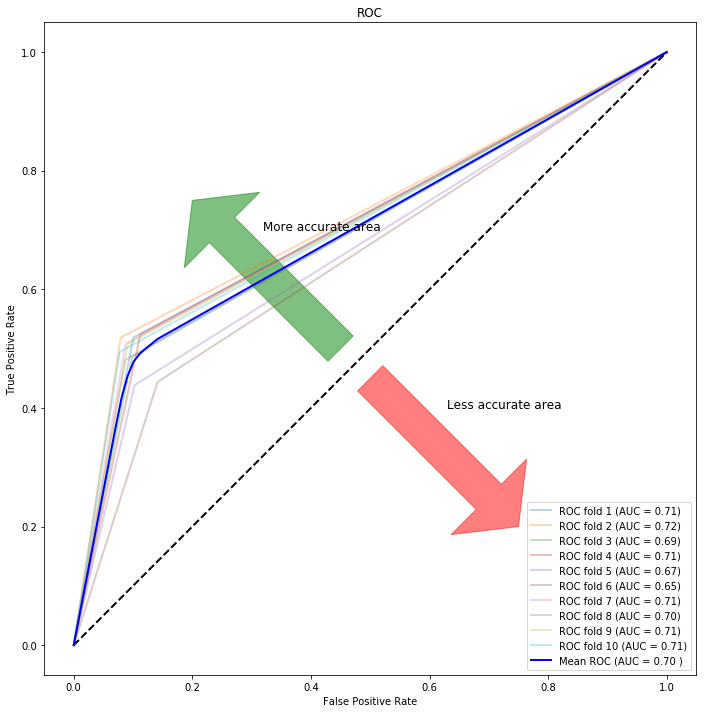

In [15]:
print("<--------------------------------------K-fold RANDOM FOREST------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier(n_estimators=150)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(pca_data,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=model.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------KNN_HO------------------------------------->
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.46      0.53       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.68      0.70      1407
weighted avg       0.77      0.79      0.78      1407



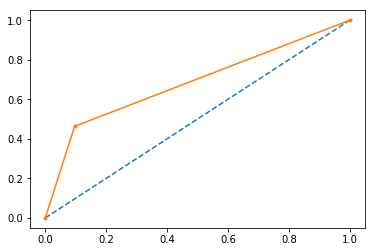

AUC: 0.684


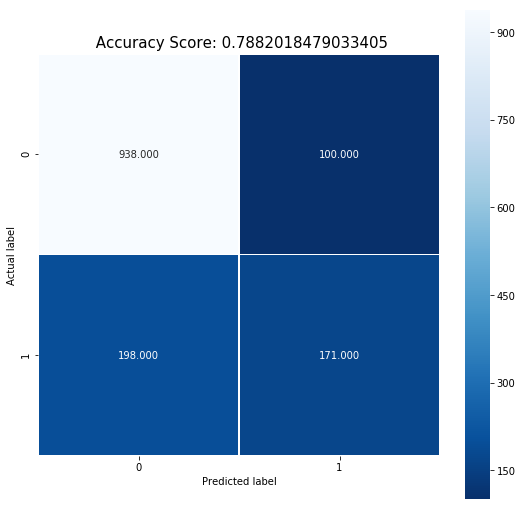

In [16]:
print("<--------------------------------------KNN_HO------------------------------------->")
from sklearn.neighbors import KNeighborsClassifier
KN=KNeighborsClassifier(n_neighbors=100)
m=KN.fit(x_train,y_train) 
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test,y_test,predictions)

<--------------------------------------KNN_KF------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7171464330413018
 ROC_AUC FOR FOLD  2 is 0.7265900557515076
 ROC_AUC FOR FOLD  3 is 0.7241438161338036
 ROC_AUC FOR FOLD  4 is 0.7520208929237657
 ROC_AUC FOR FOLD  5 is 0.6907930191103926
 ROC_AUC FOR FOLD  6 is 0.7100122289930771
 ROC_AUC FOR FOLD  7 is 0.7338069477262364
 ROC_AUC FOR FOLD  8 is 0.7238113004186877
 ROC_AUC FOR FOLD  9 is 0.7267545495999669
 ROC_AUC FOR FOLD  10 is 0.72283695923981


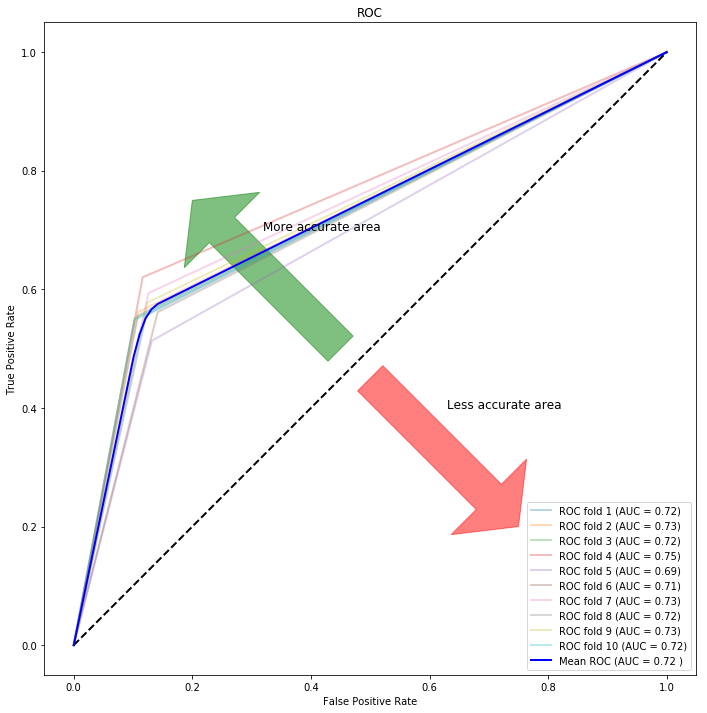

In [17]:
print("<--------------------------------------KNN_KF------------------------------------->")
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import StratifiedKFold
from scipy import interp
from sklearn.linear_model import LogisticRegression
import matplotlib.patches as patches
import matplotlib.pylab as plt
from sklearn.ensemble import RandomForestClassifier
KN=KNeighborsClassifier(n_neighbors=70)

skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(X, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(pca_data,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=KN.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()

<--------------------------------------XG-BOOST------------------------------------->
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1038
           1       0.65      0.48      0.55       369

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.80      0.79      1407



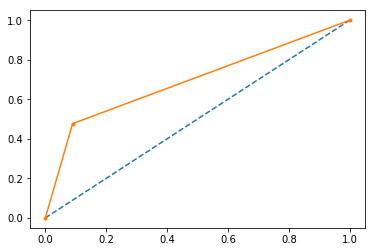

AUC: 0.694


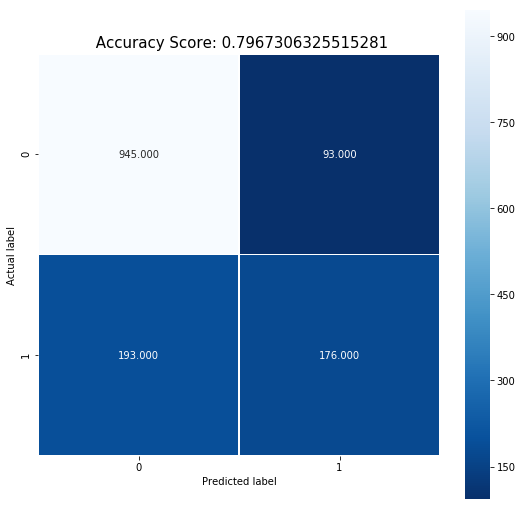

In [18]:
print("<--------------------------------------XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
m=clf.fit(x_train,y_train) 
predictions=m.predict(x_test)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test,y_test,predictions)

<--------------------------------------K-fold XG-BOOST------------------------------------->
Using  10  folds
 ROC_AUC FOR FOLD  1 is 0.7263624985777677
 ROC_AUC FOR FOLD  2 is 0.7257936056434179
 ROC_AUC FOR FOLD  3 is 0.7173171009216065
 ROC_AUC FOR FOLD  4 is 0.7359418397380094
 ROC_AUC FOR FOLD  5 is 0.7031204659453634
 ROC_AUC FOR FOLD  6 is 0.694166355760063
 ROC_AUC FOR FOLD  7 is 0.7410199809310616
 ROC_AUC FOR FOLD  8 is 0.6938969033702276
 ROC_AUC FOR FOLD  9 is 0.7106754964142105
 ROC_AUC FOR FOLD  10 is 0.7205863965991498


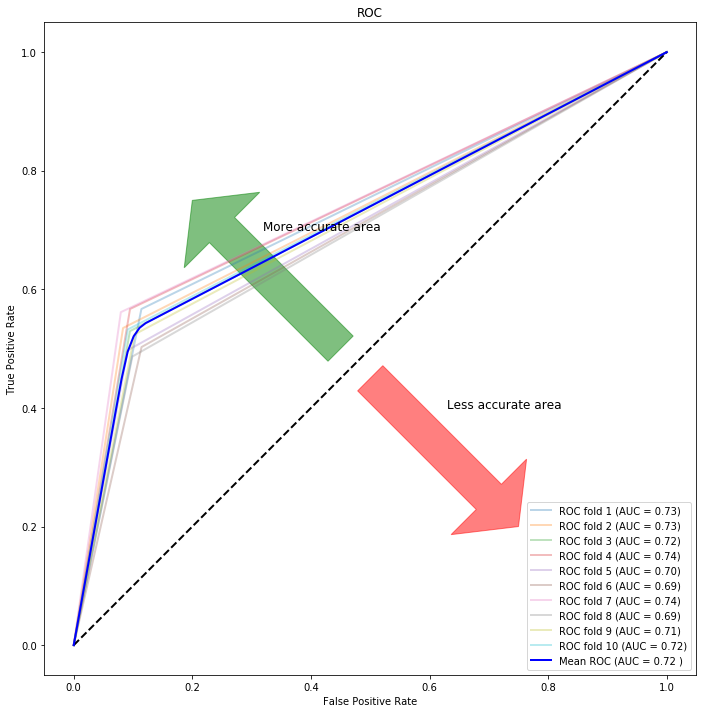

In [19]:
print("<--------------------------------------K-fold XG-BOOST------------------------------------->")
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
skf = StratifiedKFold(n_splits=10)
print("Using ",skf.get_n_splits(pca_data, Y)," folds")


fig1 = plt.figure(figsize=[12,12])
ax1 = fig1.add_subplot(111,aspect = 'equal')
ax1.add_patch(
    patches.Arrow(0.45,0.5,-0.25,0.25,width=0.3,color='green',alpha = 0.5)
    )
ax1.add_patch(
    patches.Arrow(0.5,0.45,0.25,-0.25,width=0.3,color='red',alpha = 0.5)
    )    
tprs = []
aucs = []
mean_fpr = np.linspace(0,1,100)

i=1
for train_index, test_index in skf.split(pca_data,Y ):
    #print("TRAIN:", train_index, "TEST:", test_index)
    m=clf.fit(X.iloc[train_index],Y[train_index])
    pred=m.predict(X.iloc[test_index])
    #prediction=m.predict_proba(X.iloc[test_index])
    fpr, tpr, t = roc_curve(Y[test_index], pred)
    tprs.append(interp(mean_fpr, fpr, tpr))
    roc_auc = auc(fpr, tpr)
    print(" ROC_AUC FOR FOLD ",i,"is",roc_auc)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=2, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i= i+1
 
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs, axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'Mean ROC (AUC = %0.2f )' % (mean_auc),lw=2, alpha=1)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.text(0.32,0.7,'More accurate area',fontsize = 12)
plt.text(0.63,0.4,'Less accurate area',fontsize = 12)
plt.show()